In [1]:
import os
os.chdir('/pi/zhiping.weng-umw/data/ramirezc/splice-benchmark/biosample_specific_eval')

In [ ]:
# https://www.encodeproject.org/experiments/ENCSR368UNC/

!wget https://www.encodeproject.org/files/ENCFF675MLD/@@download/ENCFF675MLD.bam

In [ ]:
!ls
!samtools sort -@ 4 -o ENCFF675MLD.sorted.bam ENCFF675MLD.bam
!samtools index -@ 4 ENCFF675MLD.sorted.bam

In [ ]:
!regtools junctions extract -s RF -o ENCFF675MLD.junctions.bed ENCFF675MLD.sorted.bam

In [ ]:
from counts_to_cpm import append_cpm_to_bed

append_cpm_to_bed('ENCFF675MLD.junctions.bed')

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

junctions = pd.read_csv('ENCFF675MLD.junctions_with_cpm.bed', sep='\t')
print(junctions.head())
print(junctions.describe())
print(junctions.shape[0])

   chr1  14815   14996  JUNC00000001  8  ?  14815.1  14996.1  255,0,0  2  \
0  chr1  15006   15823  JUNC00000002  9  ?    15006    15823  255,0,0  2   
1  chr1  15030  186324  JUNC00000011  1  ?    15030   186324  255,0,0  2   
2  chr1  15916   16617  JUNC00000003  7  ?    15916    16617  255,0,0  2   
3  chr1  16716   16885  JUNC00000004  5  ?    16716    16885  255,0,0  2   
4  chr1  17038   17263  JUNC00000005  7  ?    17038    17263  255,0,0  2   

   14,27     0,154  33.157811  
0  32,28     0,789   8.162062  
1    8,8  0,171286   0.007786  
2  31,11     0,690   7.610162  
3  49,32     0,137  23.674808  
4  17,31     0,194  23.709882  
              14815         14996             8       14815.1       14996.1  \
count  4.900200e+04  4.900200e+04  49002.000000  4.900200e+04  4.900200e+04   
mean   6.917976e+07  6.918370e+07     15.021142  6.917976e+07  6.918370e+07   
std    5.484722e+07  5.484739e+07     64.599925  5.484722e+07  5.484739e+07   
min    4.080000e+02  5.510000e+02  

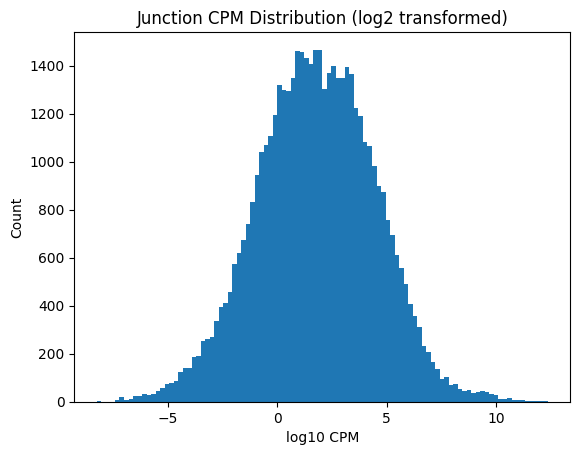

CPM >= 0.1: 47476 junctions (96.9%)
CPM >= 0.5: 41736 junctions (85.2%)
CPM >= 1: 36504 junctions (74.5%)
CPM >= 2: 29994 junctions (61.2%)
CPM >= 5: 20907 junctions (42.7%)
CPM >= 10: 14241 junctions (29.1%)


In [75]:
# Using log2 transform
log2_cpm = np.log2(junctions.iloc[:,-1] + 10e-6)  # add 1 to handle zeros

plt.hist(log2_cpm, bins=100)
plt.xlabel('log10 CPM')
plt.ylabel('Count')
plt.title('Junction CPM Distribution (log2 transformed)')
plt.show()

# Print number of junctions above different thresholds
thresholds = [0.1, 0.5, 1, 2, 5, 10]
for t in thresholds:
    n_kept = sum(junctions.iloc[:, -1] >= t)
    pct_kept = (n_kept / len(junctions)) * 100
    print(f"CPM >= {t}: {n_kept} junctions ({pct_kept:.1f}%)")